In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../DATA/cancer_classification.csv")

In [5]:
# df.info()

In [6]:
# df.describe().transpose()

In [7]:
pd.set_option('display.max_columns', None)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<AxesSubplot:>

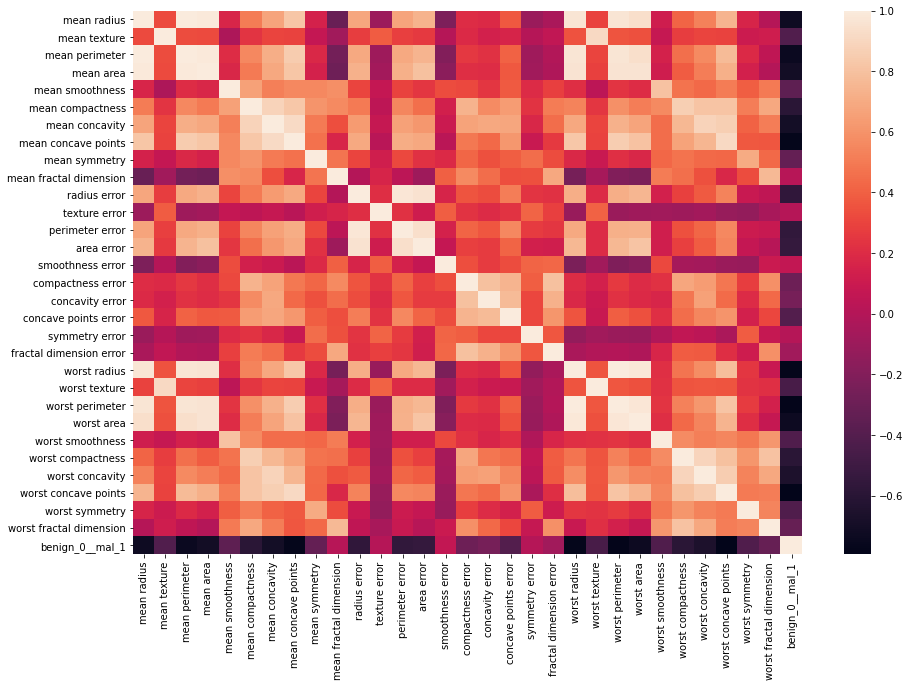

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

In [9]:
# plt.figure(figsize=(10,10))
# sns.boxplot(x='benign_0__mal_1',y='worst concave points',data=df)

In [10]:
# plt.figure(figsize=(10,10))
# sns.boxplot(x='benign_0__mal_1',y='worst perimeter',data=df)

In [11]:
# df.corr()['benign_0__mal_1'].sort_values()

# Model

In [12]:
X = df.drop('benign_0__mal_1',axis=1)
y = df['benign_0__mal_1']

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler_grid_search = MinMaxScaler().fit(X)
X_grid_search = scaler_grid_search.transform(X)

In [77]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dropout

# GRID SEARCH

In [68]:
def create_model(activation,neurons,dropout_rate=0):
    model = Sequential()

    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons/2, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons/2, activation=activation))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='BinaryCrossentropy', optimizer='adam')
    
    return model

In [69]:
model = KerasClassifier(build_fn=create_model)

In [70]:
param_grid = dict(
                    epochs = [100] #range(20,120,20)
#                   ,  batch_size = [1], #range(90,90,200)
                    ,neurons = [30,60]
                    ,activation = ['relu'] #['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
                    
#                     ,learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
#                     ,momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
    
#                     ,init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

#                     ,weight_constraint = [1, 2, 3, 4, 5]
                    ,dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
                  )

grid = GridSearchCV(estimator=model, scoring='accuracy', param_grid=param_grid, n_jobs=1, cv=3)

In [1]:
grid_result = grid.fit(X_grid_search, y.values)

In [72]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.975439 using {'activation': 'relu', 'dropout_rate': 0.0, 'epochs': 100, 'neurons': 60}
0.964829 (0.009060) with: {'activation': 'relu', 'dropout_rate': 0.0, 'epochs': 100, 'neurons': 30}
0.975439 (0.017891) with: {'activation': 'relu', 'dropout_rate': 0.0, 'epochs': 100, 'neurons': 60}
0.973666 (0.012869) with: {'activation': 'relu', 'dropout_rate': 0.1, 'epochs': 100, 'neurons': 30}
0.971911 (0.012379) with: {'activation': 'relu', 'dropout_rate': 0.1, 'epochs': 100, 'neurons': 60}
0.966639 (0.015059) with: {'activation': 'relu', 'dropout_rate': 0.2, 'epochs': 100, 'neurons': 30}
0.943832 (0.039901) with: {'activation': 'relu', 'dropout_rate': 0.2, 'epochs': 100, 'neurons': 60}
0.952594 (0.030049) with: {'activation': 'relu', 'dropout_rate': 0.3, 'epochs': 100, 'neurons': 30}
0.922761 (0.045495) with: {'activation': 'relu', 'dropout_rate': 0.3, 'epochs': 100, 'neurons': 60}
0.940314 (0.040582) with: {'activation': 'relu', 'dropout_rate': 0.4, 'epochs': 100, 'neurons': 30}
0.892

# Final Model

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [74]:
scaler = MinMaxScaler().fit(X_train)

In [75]:
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [106]:
callback = EarlyStopping(monitor='val_loss', patience=20, mode='min')

model_final = Sequential()

model_final.add(Dense(60,activation='relu'))
model_final.add(Dropout(0.2))
model_final.add(Dense(30,activation='relu'))
model_final.add(Dropout(0.2))
model_final.add(Dense(1,activation='sigmoid'))

model_final.compile(optimizer='adam',loss='binary_crossentropy')

In [2]:
model_final.fit(x=X_train_norm,y=y_train.values,
              validation_data=(X_test_norm,y_test.values),
              epochs=500, 
              callbacks=callback)

In [108]:
losses = pd.DataFrame(model_final.history.history)

<AxesSubplot:>

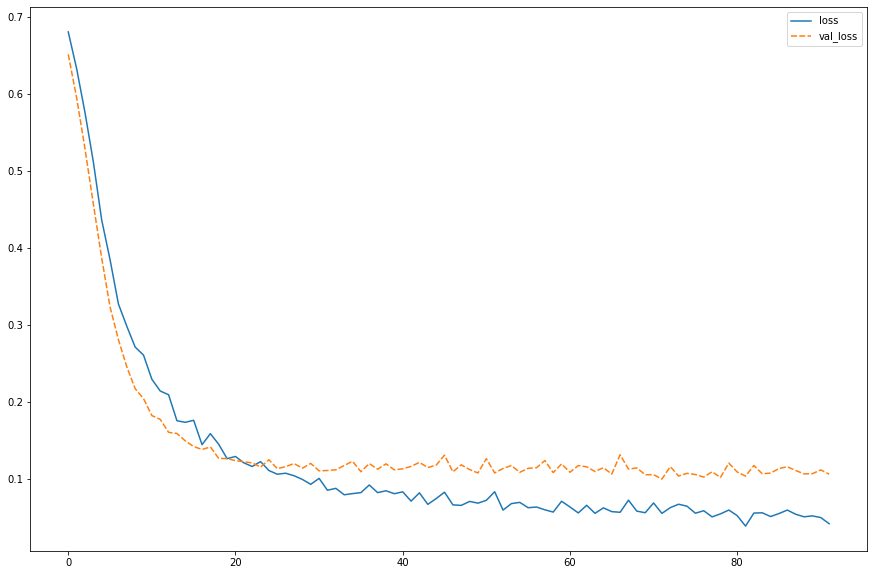

In [109]:
plt.figure(figsize=(15,10))
sns.lineplot(data=losses)

In [114]:
preds = model_final.predict(X_test_norm)

In [3]:
preds

In [116]:
preds_01 = np.array([np.where(l <= 0.5, 0, 1) for l in preds])

# Evaluation

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [118]:
preds = model_final.predict(X_test_norm)

print("Accuracy",accuracy_score(y_test,preds_01))
print("Precision",precision_score(y_test,preds_01))
print("Recall",recall_score(y_test,preds_01))

Accuracy 0.9790209790209791
Precision 0.9885057471264368
Recall 0.9772727272727273


In [119]:
confusion_matrix(y_test,preds_01)

array([[54,  1],
       [ 2, 86]], dtype=int64)